**DataFrame**

In [7]:
import operator
import pandas as pd
import numpy as np
import os
import re
import json
import re

#read location json file for index column of the dataframe
xls = pd.ExcelFile('Currency Table.xlsx')
dfsheet = {}
for sheet_name in xls.sheet_names:
    dfsheet[sheet_name] = xls.parse(sheet_name)
d = {}
for x, y in dfsheet.items():
    d[x] = pd.DataFrame(y) 

data = pd.concat(d, axis=1)
data['ALL']

,Date,USD,AUD,EUR,GBP,CHF,SGD,MYR,THB,VND,CNY,HKD,TWD,JPY,SAR,AED,KWD
0,2010-01-01 23:57:59.904,9385.60,8422.63744,13409.20672,15189.65504,9095.491104,6677.760544,2695.638176,276.875200,0.515451,1369.701534,1210.179264,293.206144,100.989056,2536.142712,2552.399994,32794.70193
1,2010-01-04 23:57:59.904,9364.20,8542.02324,13505.04924,15085.72620,9097.226658,6701.677014,2717.959050,277.929456,0.505305,1360.978552,1207.232664,295.534152,101.227002,2480.923484,2533.340700,32632.64781
2,2010-01-05 23:57:59.904,9305.20,8478.89824,13363.19772,14875.47882,9000.082492,6657.963652,2737.682892,279.528208,0.500304,1348.054944,1199.626384,291.066656,101.612784,2458.094397,2509.627725,32130.01018
3,2010-01-06 23:57:59.904,9218.10,8479.73019,13272.22038,14767.39620,8966.814594,6613.157121,2723.672007,276.543000,0.509758,1356.103125,1188.673995,290.277969,99.739842,2472.930407,2523.789050,32506.56616
4,2010-01-07 23:57:59.904,9272.50,8506.59150,13273.58375,14772.94700,8968.640175,6631.784725,2749.481700,278.175000,0.506053,1347.357375,1195.503425,290.692875,99.215750,2456.850943,2507.696940,32319.58878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3577,2020-04-23 23:57:59.904,15401.23,0.00000,16613.00000,18344.25000,0.000000,0.000000,3422.460000,456.204400,0.000000,0.000000,0.000000,0.000000,133.478500,0.000000,0.000000,0.00000
3578,2020-04-24 23:57:59.904,15587.90,0.00000,16613.00000,18344.25000,0.000000,0.000000,3422.460000,456.204400,0.000000,0.000000,0.000000,0.000000,133.478500,0.000000,0.000000,0.00000
3579,2020-04-25 23:57:59.904,15563.10,0.00000,16613.00000,18344.25000,0.000000,0.000000,3422.460000,456.204400,0.000000,0.000000,0.000000,0.000000,133.478500,0.000000,0.000000,0.00000
3580,2020-04-26 23:57:59.904,15353.36,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000


**Daily Rate Velocity**

In [396]:
from datetime import datetime as dt
df = data['ALL']
#ndf['Date'] = pd.to_datetime(df['Date'])
df['Day'] = df['Date'].dt.dayofweek
#df = df.set_index(['Date'])
#velocity
diffdf = pd.DataFrame(df.iloc[:,1:17].diff(periods=-1).dropna())
diffdf['Day'] = df['Day']
#diffdf['Day'].to_csv(r'days.csv')
diffdf

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,USD,AUD,EUR,GBP,CHF,SGD,MYR,THB,VND,CNY,HKD,TWD,JPY,SAR,AED,KWD,Day
0,21.40,-119.38580,-95.84252,103.92884,-1.735554,-23.916470,-22.320874,-1.054256,0.010146,8.722982,2.946600,-2.328008,-0.237946,55.219228,19.059294,162.05412,4
1,59.00,63.12500,141.85152,210.24738,97.144166,43.713362,-19.723842,-1.598752,0.005002,12.923608,7.606280,4.467496,-0.385782,22.829087,23.712975,502.63763,0
2,87.10,-0.83195,90.97734,108.08262,33.267898,44.806531,14.010885,2.985208,-0.009454,-8.048181,10.952389,0.788687,1.872942,-14.836010,-14.161325,-376.55598,1
3,-54.40,-26.86131,-1.36337,-5.55080,-1.825581,-18.627604,-25.809693,-1.632000,0.003705,8.745750,-6.829430,-0.414906,0.524092,16.079464,16.092110,186.97738,2
4,59.80,-11.47092,-0.07441,69.47780,-25.258200,28.674127,14.138943,0.872730,0.003355,9.264788,7.710014,-0.428445,-0.189283,17.032365,17.767082,180.40153,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3576,12.01,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,2
3577,-186.67,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,3
3578,24.80,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,4
3579,209.74,0.00000,16613.00000,18344.25000,0.000000,0.000000,3422.460000,456.204400,0.000000,0.000000,0.000000,0.000000,133.478500,0.000000,0.000000,0.00000,5


**Weekly Rate Velocity**

In [491]:
#part 1 = row 0
v1 = pd.DataFrame([0], columns =['USD'])
#part 2 = row 1-210
arow = df['USD'].iloc[1:211]
roll = arow.rolling(window=5)
smax = roll.max() 
smin = roll.min()
v = smax - smin
temp = pd.DataFrame(v)
n = pd.Series(range(4,210,5))
v2 = temp.iloc[n]
#part 3 = row 211-217
arow = df['USD'].iloc[211:218]
roll = arow.rolling(window=7)
smax = roll.max() 
smin = roll.min()
v = smax - smin
temp = pd.DataFrame(v)
v3 = pd.DataFrame(temp.iloc[6]).T
#part 4 = row 218-322
arow = df['USD'].iloc[218:323]
roll = arow.rolling(window=5)
smax = roll.max() 
smin = roll.min()
v = smax - smin
temp = pd.DataFrame(v)
n = pd.Series(range(4,105,5))
v4 = temp.iloc[n]
#part 5 = row 323-455
arow = df['USD'].iloc[323:456]
roll = arow.rolling(window=7)
smax = roll.max() 
smin = roll.min()
v = smax - smin
temp = pd.DataFrame(v)
n = pd.Series(range(6,133,7))
v5 = temp.iloc[n]
#part 6 = row 456-459
arow = df['USD'].iloc[456:460]
roll = arow.rolling(window=4)
smax = roll.max() 
smin = roll.min()
v = smax - smin
temp = pd.DataFrame(v)
v6 = pd.DataFrame(temp.iloc[3]).T
#part 7 = row 460-711
arow = df['USD'].iloc[460:712]
roll = arow.rolling(window=7)
smax = roll.max() 
smin = roll.min()
v = smax - smin
temp = pd.DataFrame(v)
n = pd.Series(range(6,252,7))
v7 = temp.iloc[n]
#part 8 = row 712-717
arow = df['USD'].iloc[712:718]
roll = arow.rolling(window=6)
smax = roll.max() 
smin = roll.min()
v = smax - smin
temp = pd.DataFrame(v)
v8 = pd.DataFrame(temp.iloc[5]).T
#part 9 = row 718-829
arow = df['USD'].iloc[718:830]
roll = arow.rolling(window=7)
smax = roll.max() 
smin = roll.min()
v = smax - smin
temp = pd.DataFrame(v)
n = pd.Series(range(6,112,7))
v9 = temp.iloc[n]
#part 10 = row 830-835
arow = df['USD'].iloc[830:836]
roll = arow.rolling(window=6)
smax = roll.max() 
smin = roll.min()
v = smax - smin
temp = pd.DataFrame(v)
v10 = pd.DataFrame(temp.iloc[5]).T
#part 11= row 836-1829
arow = df['USD'].iloc[836:1830]
roll = arow.rolling(window=7)
smax = roll.max() 
smin = roll.min()
v = smax - smin
temp = pd.DataFrame(v)
n = pd.Series(range(6,994,7))
v11 = temp.iloc[n]
#part 12 = row 1830-1835
arow = df['USD'].iloc[1830:1836]
roll = arow.rolling(window=6)
smax = roll.max() 
smin = roll.min()
v = smax - smin
temp = pd.DataFrame(v)
v12 = pd.DataFrame(temp.iloc[5]).T
#part 13 = row 1836-1945
arow = df['USD'].iloc[1836:1946]
roll = arow.rolling(window=5)
smax = roll.max() 
smin = roll.min()
v = smax - smin
temp = pd.DataFrame(v)
n = pd.Series(range(4,110,5))
v13 = temp.iloc[n]
#part 14 = row 1946-1999
arow = df['USD'].iloc[1946:2000]
roll = arow.rolling(window=6)
smax = roll.max() 
smin = roll.min()
v = smax - smin
temp = pd.DataFrame(v)
n = pd.Series(range(5,54,6))
v14 = temp.iloc[n]
#part 15 = row 2000-3581
arow = df['USD'].iloc[2000:3582]
roll = arow.rolling(window=7)
smax = roll.max() 
smin = roll.min()
v = smax - smin
temp = pd.DataFrame(v)
n = pd.Series(range(6,1582,7))
v15 = temp.iloc[n]

#concatenate all data
vn = [v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15]
veloc = pd.concat(vn, ignore_index=True)
veloc

,USD
0,0.00
1,151.50
2,85.10
3,164.95
4,149.95
...,...
534,447.80
535,363.32
536,458.00
537,525.84


**USD-IDR Rate Velocity**

Text(0, 0.5, 'USD-IDR Rate')

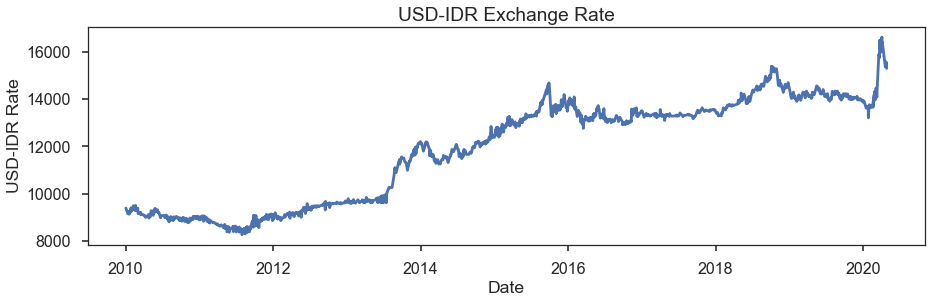

In [527]:
import pandas as pd
from fbprophet import Prophet
import matplotlib.pyplot as plt
plt.style.use(['seaborn-poster'])

fig, ax = plt.subplots(figsize=(15, 4))
ax.title.set_text('USD-IDR Exchange Rate')
ax.plot(data['ALL','Date'], data['ALL','USD'])
ax.set_xlabel('Date')
ax.set_ylabel('USD-IDR Rate')

Text(0, 0.5, 'velocity')

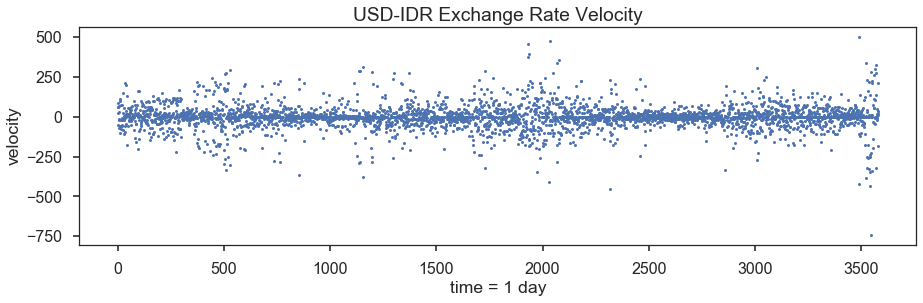

In [528]:
#velocity t=1
fig, ax = plt.subplots(figsize=(15, 4))
ax.title.set_text('USD-IDR Exchange Rate Velocity')
nrow = pd.Series(range(0, diffdf['USD'].count()))
ax.plot(nrow, diffdf['USD'], 'o', markersize=3)
ax.set_xlabel('time = 1 day')
ax.set_ylabel('velocity')

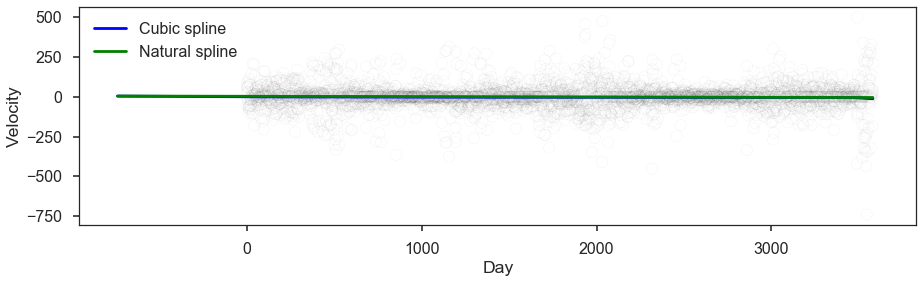

In [530]:
import pandas as pd
from patsy import dmatrix
import statsmodels.api as sm

# Fit a cubic spline with knots
x_cubic = dmatrix('bs(x, knots=(200, 1800, 3000))', {'x': nrow})
fit_cubic = sm.GLM(diffdf['USD'], x_cubic).fit()

# Fit a natural spline with knots
x_natural = dmatrix('cr(x, knots=(200, 1800, 3000))', {'x': nrow})
fit_natural = sm.GLM(diffdf['USD'], x_natural).fit()

# Create spline lines for 50 
xp = np.linspace(diffdf['USD'].min(), nrow.max(), 1800)
line_cubic = fit_cubic.predict(dmatrix('bs(xp, knots=(200, 1800, 3000))', {'xp': xp}))
line_natural = fit_natural.predict(dmatrix('cr(xp, knots=(200, 1800, 3000))', {'xp': xp}))

# Plot both spline lines and the data
plt.rcParams["figure.figsize"] = (15,4)
plt.plot(xp, line_cubic, color='b', label='Cubic spline')
plt.plot(xp, line_natural, color='g', label='Natural spline')
plt.legend()
plt.scatter(nrow, diffdf['USD'], facecolor='None', edgecolor='k', alpha=0.05)
plt.xlabel('Day')
plt.ylabel('Velocity')
plt.show()

Text(0, 0.5, 'velocity')

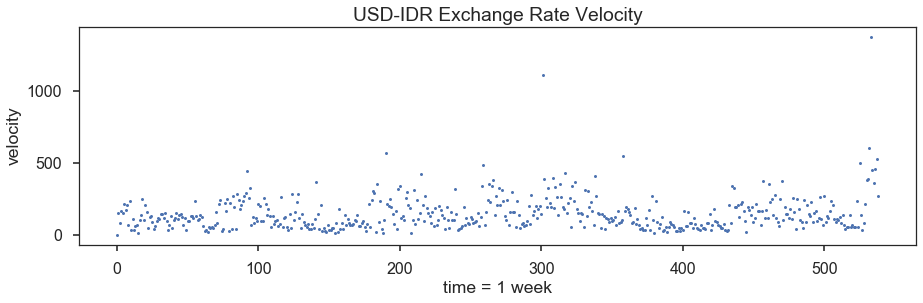

In [541]:
#velocity t=weekly
fig, ax = plt.subplots(figsize=(15, 4))
ax.title.set_text('USD-IDR Exchange Rate Velocity')
nrow = pd.Series(range(0, veloc['USD'].count()))
ax.plot(nrow, veloc['USD'], 'o', markersize=3)
ax.set_xlabel('time = 1 week')
ax.set_ylabel('velocity')

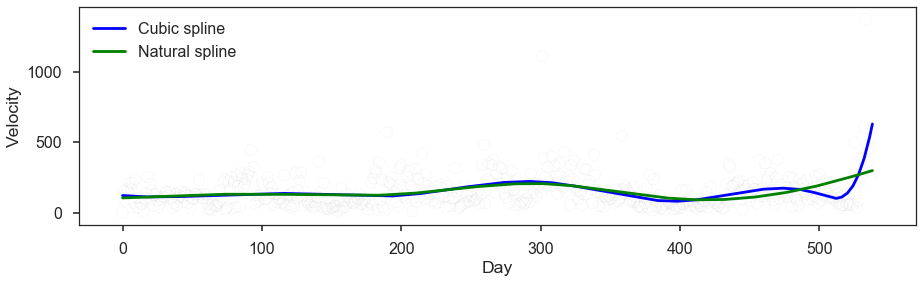

In [542]:
import pandas as pd
from patsy import dmatrix
import statsmodels.api as sm

# Fit a cubic spline with knots
x_cubic = dmatrix('bs(x, knots=(100, 200, 300, 400, 500))', {'x': nrow})
fit_cubic = sm.GLM(veloc['USD'], x_cubic).fit()

# Fit a natural spline with knots
x_natural = dmatrix('cr(x, knots=(100, 200, 300, 400, 500))', {'x': nrow})
fit_natural = sm.GLM(veloc['USD'], x_natural).fit()

# Create spline lines for 50 
xp = np.linspace(veloc['USD'].min(), nrow.max(), 270)
line_cubic = fit_cubic.predict(dmatrix('bs(xp, knots=(100, 200, 300, 400, 500))', {'xp': xp}))
line_natural = fit_natural.predict(dmatrix('cr(xp, knots=(100, 200, 300, 400, 500))', {'xp': xp}))

# Plot both spline lines and the data
plt.rcParams["figure.figsize"] = (15,4)
plt.plot(xp, line_cubic, color='b', label='Cubic spline')
plt.plot(xp, line_natural, color='g', label='Natural spline')
plt.legend()
plt.scatter(nrow, veloc['USD'], facecolor='None', edgecolor='k', alpha=0.05)
plt.xlabel('Day')
plt.ylabel('Velocity')
plt.show()

In [536]:
veloc['USD'].median()

117.10000000000036